In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
data = pd.read_csv('D:/A-bus/BATP/data/dataset/1-00720.csv')
data = data.sort_values(by=['global_order', 'date'])
data = data.loc[data.route_info=='1/00720', :]
# ['1/00740','1/M3723','1/M5063','2/00740','2/M3723','2/M5063']
data
# max(data.loc[data.route_info=='2/00740', 'station_order']) # 38

,station_order,global_order,timestamp,route_info,date
0,1,1,23333.0,1/00720,1
1,2,1,23472.0,1/00720,1
2,3,1,23622.0,1/00720,1
3,4,1,23735.0,1/00720,1
4,5,1,23960.0,1/00720,1
...,...,...,...,...,...
41755,25,48,61428.0,1/00720,30
41756,26,48,61588.0,1/00720,30
41757,27,48,61715.0,1/00720,30
41758,28,48,61781.0,1/00720,30


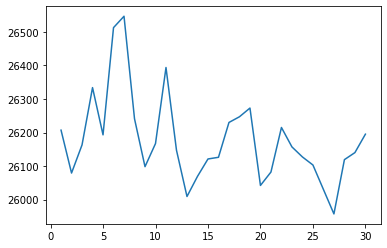

In [6]:
#### 同一个global_order,不同的站点，不同的date
data1 = data.loc[data.global_order==5, :]
data1 = data1.groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
time_g5 = data1.timestamp[0]
time_g5_s1 = [time_g5[i*29] for i in range(30)]
time_g5_s1[25] = (time_g5_s1[24] + time_g5_s1[26])//2
time_g5_s2 = [time_g5[i*29+1] for i in range(30)]
time_g5_s3 = [time_g5[i*29+2] for i in range(30)]
time_g5_s4 = [time_g5[i*29+3] for i in range(30)]
time_g5_s5 = [time_g5[i*29+4] for i in range(30)]
time_g5_s6 = [time_g5[i*29+5] for i in range(30)]
time_g5_s7 = [time_g5[i*29+6] for i in range(30)]
for i in range(1, 2):
    exec('plt.plot(list(range(1,31)), time_g5_s{})'.format(i))
plt.show()

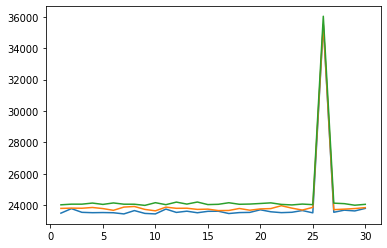

In [4]:
### 同一个站点，不同global
data1 = data.loc[data.global_order==1, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data2 = data.loc[data.global_order==2, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data3 = data.loc[data.global_order==3, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})

time_g1 = data1.timestamp[0]
time_g2 = data2.timestamp[0]
time_g3 = data3.timestamp[0]
time_g1_s10 = [time_g1[i*38+9] for i in range(30)]
time_g2_s10 = [time_g2[i*38+9] for i in range(30)]
time_g3_s10 = [time_g3[i*38+9] for i in range(30)]
for i in range(1,4):
    exec('plt.plot(list(range(1,31)), time_g{}_s10)'.format(i))
plt.show()

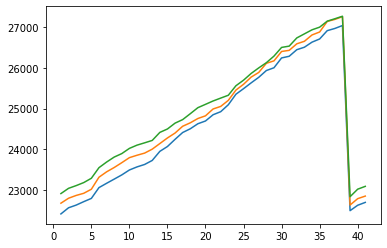

In [5]:
### 不同global order，不同站点， 同一天
data1 = data.loc[data.global_order==1, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data2 = data.loc[data.global_order==2, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data3 = data.loc[data.global_order==3, :].groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
time_g1_d1 = data1.timestamp[0][:41]
time_g2_d2 = data2.timestamp[0][:41]
time_g3_d3 = data3.timestamp[0][:41]
for i in range(1,4):
    exec('plt.plot(list(range(1,42)), time_g{}_d{})'.format(i,i))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (62,) and (110,)

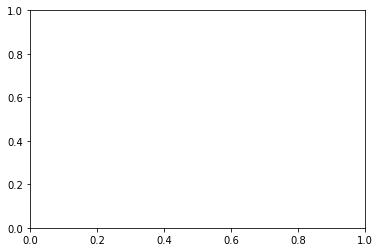

In [6]:
### 随着global_order的增加，不同站点的变化情况
### 研究global_order是否有周期性
time_g_s1_d1 = data.loc[(data.date==13)&(data.station_order==1), 'timestamp']
time_g_s2_d1 = data.loc[(data.date==13)&(data.station_order==10), 'timestamp']
time_g_s3_d1 = data.loc[(data.date==13)&(data.station_order==20), 'timestamp']
time_g_s4_d1 = data.loc[(data.date==13)&(data.station_order==30), 'timestamp']
time_g_s5_d1 = data.loc[(data.date==13)&(data.station_order==40), 'timestamp']
# time_g_s6_d1 = data.loc[(data.date==1)&(data.station_order==6), 'timestamp']

for i in range(1,6):
    exec('plt.plot(list(range(1,63)), time_g_s{}_d1)'.format(i))
plt.show()

In [ ]:
#### 检查到达时间随global order的变化是否具有pattern
mean1 = np.mean(np.diff(time_g_s1_d1))
time_g_s1_d1_diff = [time_g_s1_d1.values[i]-mean1*i for i in range(62)]
mean2 = np.mean(np.diff(time_g_s2_d1))
time_g_s2_d1_diff = [time_g_s2_d1.values[i]-mean2*i for i in range(62)]
mean3 = np.mean(np.diff(time_g_s3_d1))
time_g_s3_d1_diff = [time_g_s3_d1.values[i]-mean3*i for i in range(62)]
mean4 = np.mean(np.diff(time_g_s4_d1))
time_g_s4_d1_diff = [time_g_s4_d1.values[i]-mean4*i for i in range(62)]

for i in range(1,5):
    exec('plt.plot(list(range(1,63)), time_g_s{}_d1_diff)'.format(i))
plt.show()

In [ ]:
diff1 = np.diff(time_g_s1_d1)
diff2 = np.diff(time_g_s2_d1)
diff3 = np.diff(time_g_s3_d1)
diff4 = np.diff(time_g_s4_d1)

for i in range(1,5):
    exec('plt.plot(list(range(1,62)), diff{})'.format(i))
plt.show()

## FFT

In [ ]:
import scipy.fft
A_signal_fft = scipy.fft.fft(time_g5_s1)
Fs
frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)

fig=plt.figure(2, figsize=(15,6))
plt.clf()
plt.plot(frequencies, np.abs(A_signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(A_signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$")

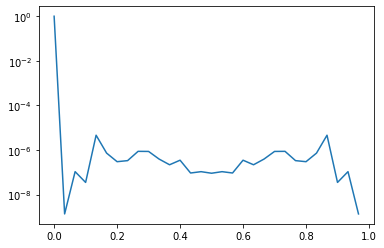

In [6]:
# apply fast fourier transform and take absolute values
f=abs(np.fft.fft(time_g5_s1))

# get the list of frequencies
num = 30
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

## 清理数据

In [149]:
import random
# 1-M3723
data_c = data.copy()
time_g_s2_d1 = data_c.loc[(data_c.date==1)&(data_c.station_order==2), 'timestamp']
for i in range(1, 31):
    tmp = data_c.loc[(data_c.date==i)&(data_c.station_order==2), 'timestamp'] - random.randint(90,300)
    data_c.loc[(data_c.date==i)&(data_c.station_order==1), 'timestamp'] = list(tmp.values)
data = data_c.copy()
# 1-

## 导出数据

In [141]:
data

,station_order,global_order,timestamp,route_info,route_id,type,date
126794,1,1,22923.0,1/M3723,M3723,1,1
126795,2,1,23061.0,1/M3723,M3723,1,1
126796,3,1,23123.0,1/M3723,M3723,1,1
126797,4,1,23206.0,1/M3723,M3723,1,1
126798,5,1,23312.0,1/M3723,M3723,1,1
...,...,...,...,...,...,...,...
201368,37,62,73030.0,1/M3723,M3723,1,30
201369,38,62,73119.0,1/M3723,M3723,1,30
201370,39,62,73243.0,1/M3723,M3723,1,30
201371,40,62,73333.0,1/M3723,M3723,1,30


In [142]:
###  train:344   val:86+3   test:1 bz=16
### global_order  train:50   val:10   test:2
data = data.groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
saveTrain = 'D:/A-bus/BATP/data/dataset/1-M3723/train.txt'
data_train = data.loc[:49,'timestamp'].reset_index(drop=True)
saveFile = open(saveTrain,'a')
TrainOrder = 'D:/A-bus/BATP/data/dataset/1-M3723/train_order.txt'
trainOrder = data.loc[:49,'global_order'].reset_index(drop=True)
saveOrder = open(TrainOrder,'a')
for i in range(len(data_train)):
    lineToWrite = data_train[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(trainOrder)):
    lineToWrite = trainOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

saveVal = 'D:/A-bus/BATP/data/dataset/1-M3723/val.txt'
data_val = data.loc[50:59,'timestamp'].reset_index(drop=True)
saveFile = open(saveVal,'a')
ValOrder = 'D:/A-bus/BATP/data/dataset/1-M3723/val_order.txt'
valOrder = data.loc[50:59,'global_order'].reset_index(drop=True)
saveOrder = open(ValOrder,'a')
for i in range(len(data_val)):
    lineToWrite = data_val[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(valOrder)):
    lineToWrite = valOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

saveTest = 'D:/A-bus/BATP/data/dataset/1-M3723/test.txt'
data_test = data.loc[60:,'timestamp'].reset_index(drop=True)
saveFile = open(saveTest,'a')
TestOrder = 'D:/A-bus/BATP/data/dataset/1-M3723/test_order.txt'
testOrder = data.loc[60:,'global_order'].reset_index(drop=True)
saveOrder = open(TestOrder,'a')
for i in range(len(data_test)):
    lineToWrite = data_test[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
for i in range(len(testOrder)):
    lineToWrite = testOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()